In [5]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] Tesla V100-SXM2-16GB
    • Total memory: 15.8 GB
    • Compute capability: 7.0
✅ plot_set complete.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib.colors as mcolors

def rgba_list_to_hex(colors, include_alpha=False):
    """
    把一系列 RGBA 元组转换成 HTML 十六进制颜色值。
    
    参数：
      colors: Iterable of (r, g, b, a) tuples, each in [0, 1]
      include_alpha: bool, 是否在输出中包含 alpha 通道
    
    返回：
      List of strings, 如 ['#RRGGBB', …] 或 ['#RRGGBBAA', …]
    """
    hex_list = []
    for rgba in colors:
        # matplotlib 的 to_hex 自动处理 RGB，也能加透明度
        hex_code = mcolors.to_hex(rgba, keep_alpha=include_alpha)
        hex_list.append(hex_code)
    return hex_list

# 示例用法
from colormaps.colormap import Colormap
cmap = Colormap([(1,0,0,1), (0,1,0,0.5), (0,0,1,1)], name='mylist')

# 只要 RGB
html_colors = rgba_list_to_hex(cmap.colors)
print(html_colors)
# 输出: ['#FF0000', '#00FF00', '#0000FF']

# 要包含 alpha 通道
html_colors_with_alpha = rgba_list_to_hex(cmap.colors, include_alpha=True)
print(html_colors_with_alpha)
# 输出: ['#FF0000FF', '#00FF0080', '#0000FFFF']


['#ff0000', '#00ff00', '#0000ff']
['#ff0000ff', '#00ff0080', '#0000ffff']


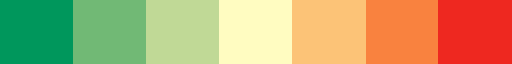

In [7]:
import colormaps as cmaps
cmaps.drought_severity

In [8]:
rgba_list_to_hex(cmaps.cet_g_bw_minc_minl.colors)

['#d60000',
 '#018700',
 '#b500ff',
 '#05acc6',
 '#97ff00',
 '#ffa52f',
 '#ff8ec8',
 '#79525e',
 '#00fdcf',
 '#afa5ff',
 '#93ac83',
 '#9a6900',
 '#366962',
 '#d3008c',
 '#fdf490',
 '#c86e66',
 '#9ee2ff',
 '#00c846',
 '#a877ac',
 '#b8ba01',
 '#f4bfb1',
 '#ff28fd',
 '#f2cdff',
 '#009e7c',
 '#ff6200',
 '#56642a',
 '#953f1f',
 '#90318e',
 '#ff3464',
 '#a0e491',
 '#8c9ab1',
 '#829026',
 '#ae083f',
 '#77c6ba',
 '#bc9157',
 '#e48eff',
 '#72b8ff',
 '#c6a5c1',
 '#ff9070',
 '#d3c37c',
 '#bceddb',
 '#6b8567',
 '#916e56',
 '#f9ff00',
 '#bac1df',
 '#ac567c',
 '#ffcd03',
 '#ff49b1',
 '#c15603',
 '#5d8c90',
 '#c144bc',
 '#00753f',
 '#ba6efd',
 '#00d493',
 '#00ff75',
 '#49a150',
 '#cc9790',
 '#00ebed',
 '#db7e01',
 '#f77589',
 '#b89500',
 '#c84248',
 '#00cff9',
 '#755726',
 '#85d401',
 '#ebffd4',
 '#a77b87',
 '#db72c8',
 '#cae256',
 '#8abf5d',
 '#a1216b',
 '#855b89',
 '#89bacf',
 '#ffbad6',
 '#b6cfaa',
 '#97414d',
 '#67aa00',
 '#fde1b1',
 '#ff3628',
 '#80793d',
 '#d6e8ff',
 '#a795c6',
 '#7ea59a',
 '#d

In [9]:
#import pertpy as pt
adata = sc.read('../omic_test/data/lazy_test.h5ad')
adata

AnnData object with n_obs × n_vars = 9798 × 14589
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'n_genes', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'S_score', 'G2M_score', 'phase', 'leiden_r1.5', 'L1_result_smooth', 'L1_result', 'best_clusters', 'leiden_clusters_L1', 'louvain_clusters_L1', 'leiden_clusters_L2', 'louvain_clusters_L2'
    var: 'mt', 'n_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features', 'highly_variable'
    uns: 'L1_Round0_self-projection_colors', 'L1_Round1_colors', 'L1_Round1_self-projection_colors', 'L1_Round2_colors', 'L1_Round2_self-projection_colors', 'L1_Round3_colors', 'L1_Round3_self-projection_colors', 'L1_Round4_colors', 'L1_Round4_self-projection_colors', 'L1_Round5_colors', 'L1_Round5_self-projection_colors', 'REFERENCE_MANU', 'batch_colors', 'bench_best_res', 'best_clusters_colors',

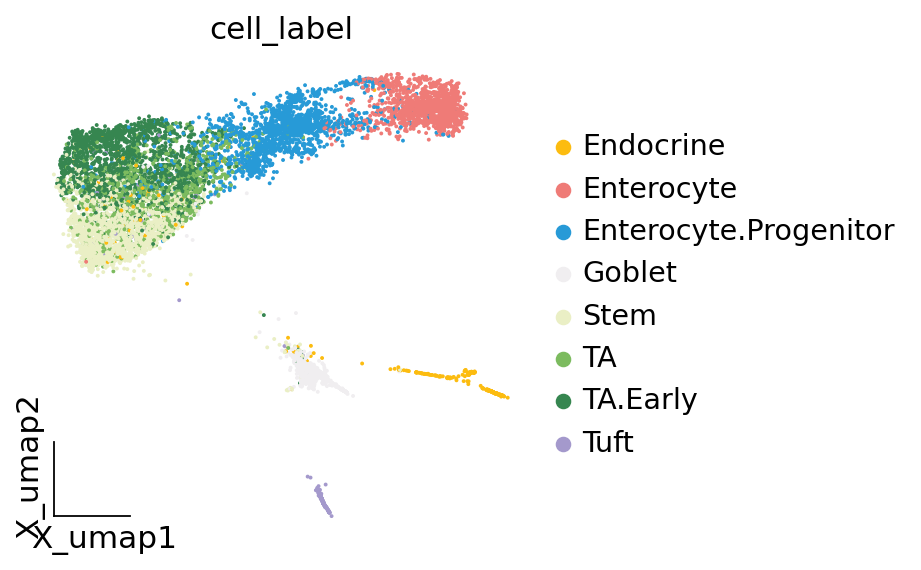

In [26]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['cell_label'],
    palette=ov.pl.sc_color[5:],
    wspace=0.55,
    ncols=1
)

In [12]:
# 
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    local_model_dir="./my_models"
)

🔨 Creating ontology resources from OBO file...
📖 Parsing ontology file...
🧠 Creating NLP embeddings...
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🔄 Encoding 16841 ontology labels...


Batches:   0%|          | 0/527 [00:00<?, ?it/s]

💾 Embeddings saved to: new_ontology/ontology_embeddings.pkl
📋 Ontology mappings included: 16841 cell types
✓ Ontology resources creation completed!


In [11]:
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    embeddings_path='new_ontology/ontology_embeddings.pkl',
    local_model_dir="./my_models"
)

📥 Loading existing ontology embeddings...
📥 Loaded embeddings for 16841 ontology labels
📋 Ontology mappings loaded: 16841 cell types


In [12]:

mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="gut",    # 组织上下文
    species="mouse",                   # 物种信息
    study_context="Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection",
    api_key="sk-*"
)

mapper.load_cell_taxonomy_resource("new_ontology/Cell_Taxonomy_resource.txt", 
                                   species_filter=["Homo sapiens", "Mus musculus"])


✓ Loaded 101 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: gut
🔬 Study context: Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection
🐭 Species: mouse
📊 Loading Cell Taxonomy resource from: new_ontology/Cell_Taxonomy_resource.txt
✓ Loaded 226222 taxonomy entries
🐭 Filtered by species ['Homo sapiens', 'Mus musculus']: 224736/226222 entries
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🧠 Creating embeddings for 2540 taxonomy cell types...


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

✓ Created taxonomy embeddings for 2540 cell types
📈 Species distribution:
  🐭 Mus musculus: 141727 entries
  🐭 Homo sapiens: 83009 entries
🧬 Unique cell types: 2540
🎯 Unique markers: 25818


True

In [13]:
enhanced_results = mapper.map_adata_with_taxonomy(
    adata, 
    cell_name_col="cell_label",
    new_col_name="enhanced_cell_ontology",
    expand_abbreviations=True,
    use_taxonomy=True,
    species="Homo sapiens",
    tissue_context="gut",
    threshold=0.3,
)

📊 Using 8 unique cell names from column 'cell_label'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: gut
🔬 Using study context: Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection
🐭 Species: Homo sapiens
  🔤 Identified potential abbreviation: Stem
  🔤 Identified potential abbreviation: TA.Early
  🔤 Identified potential abbreviation: TA
  🔤 Identified potential abbreviation: Tuft
  🔤 Identified potential abbreviation: Goblet

🤖 Expanding 5 abbreviations using LLM...
  📝 [1/5] Expanding: Stem
    ✓ → Intestinal stem cell (Confidence: high)
    💡 Alternatives: Stem cell, Crypt stem cell
  📝 [2/5] Expanding: TA.Early
    ✓ → Transit Amplifying Early Cell (Confidence: high)
    💡 Alternatives: Transit Amplifying Progenitor Cell (Early Stage)
  📝 [3/5] Expanding: TA
    ✓ → Transit Amplifying cell (Confidence: high)
    💡 Alternatives: T cell activation-re

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  🤖 [1/8] LLM selecting for: Enterocyte.Progenitor
    ✓ LLM selected: enterocyte of epithelium proper of small intestine (rank 3, sim: 0.646)
    💡 Reasoning: The study context specifies epithelial cells from the small intestine, and the term 'enterocyte of e...
  🤖 [2/8] LLM selecting for: Enterocyte
    ✓ LLM selected: enterocyte of epithelium of small intestine (rank 3, sim: 0.693)
    💡 Reasoning: The study focuses on epithelial cells from the small intestine of mice, and the term 'enterocyte of ...
  🤖 [3/8] LLM selecting for: Endocrine
    ✓ LLM selected: endocrine cell (rank 4, sim: 0.592)
    💡 Reasoning: Endocrine cells are a well-defined cell type found in the gut epithelium, specifically in the small ...
  🤖 [4/8] LLM selecting for: Intestinal stem cell
    ✓ LLM selected: intestinal crypt stem cell of small intestine (rank 2, sim: 0.733)
    💡 Reasoning: The study focuses on epithelial cells from the small intestine, and the term 'intestinal crypt stem ...
  🤖 [5/8] LLM se

In [14]:
adata.obs.to_csv('data/gut_anno.csv')

In [37]:
type_dict=dict(zip(
    adata.obs['cell_label'],
    adata.obs['enhanced_cell_ontology_taxonomy_match'],
))

In [38]:
color_dict=dict(zip(
    adata.obs['cell_label'].cat.categories,
    adata.uns['cell_label_colors'],
))

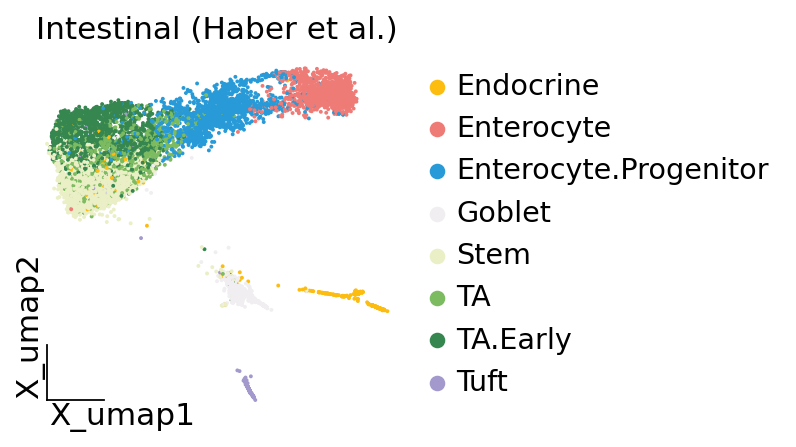

In [39]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='cell_label',
    title='Intestinal (Haber et al.)',
    show=False,
    palette=color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-gut-author-33.png',dpi=300,bbox_inches='tight')

In [40]:
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict

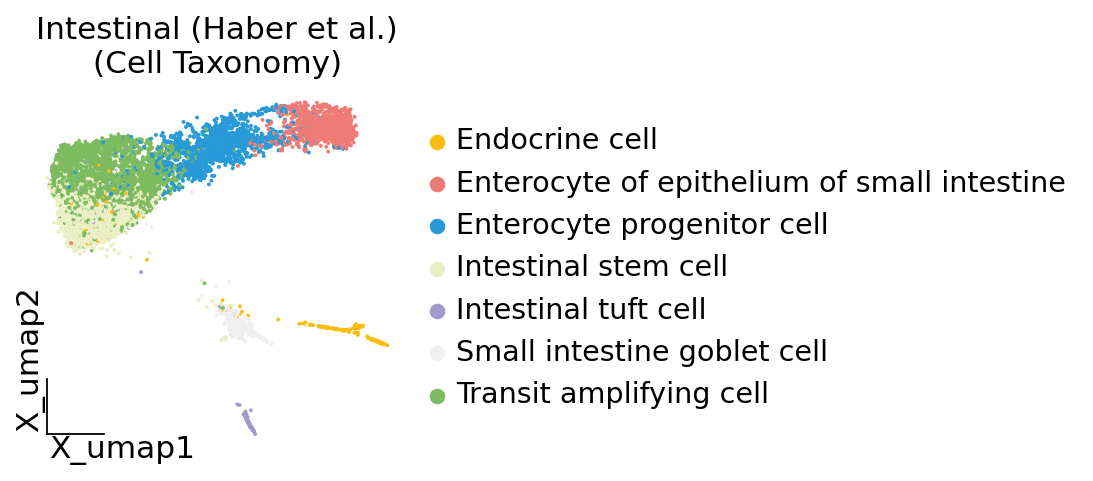

In [41]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='enhanced_cell_ontology_taxonomy_match',
    title='Intestinal (Haber et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    #palette=rgba_list_to_hex(cmaps.greenorange_12.colors)+ov.pl.sc_color[11:],
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-gut-taxonomy-33.png',dpi=300,bbox_inches='tight')

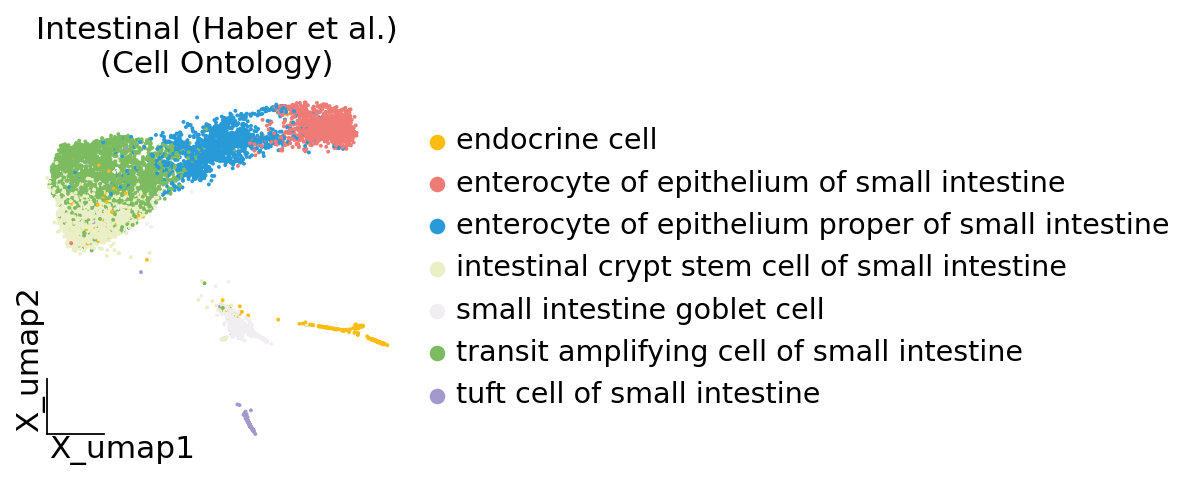

In [32]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology'

type_dict=dict(zip(
    adata.obs['cell_label'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_label'].cat.categories,
    adata.uns['cell_label_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Intestinal (Haber et al.)\n(Cell Ontology)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-gut-ontology-33.png',dpi=300,bbox_inches='tight')

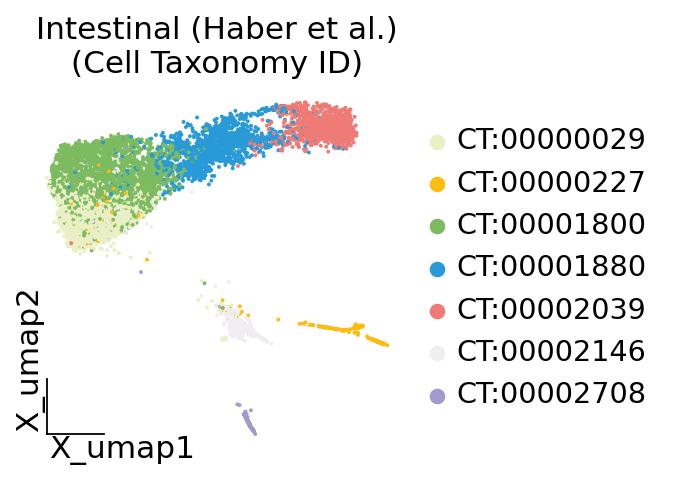

In [33]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_ct_id'

type_dict=dict(zip(
    adata.obs['cell_label'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_label'].cat.categories,
    adata.uns['cell_label_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Intestinal (Haber et al.)\n(Cell Taxonomy ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-gut-taxonomy-id-33.png',dpi=300,bbox_inches='tight')

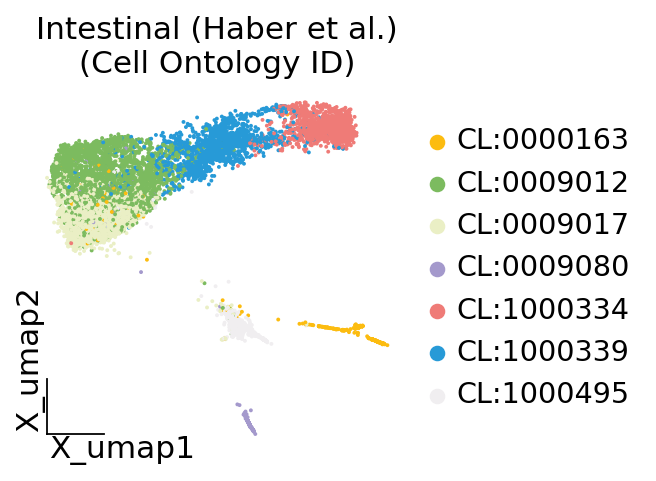

In [34]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_cl_id'

type_dict=dict(zip(
    adata.obs['cell_label'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_label'].cat.categories,
    adata.uns['cell_label_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Intestinal (Haber et al.)\n(Cell Ontology ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-gut-ontology-id-33.png',dpi=300,bbox_inches='tight')

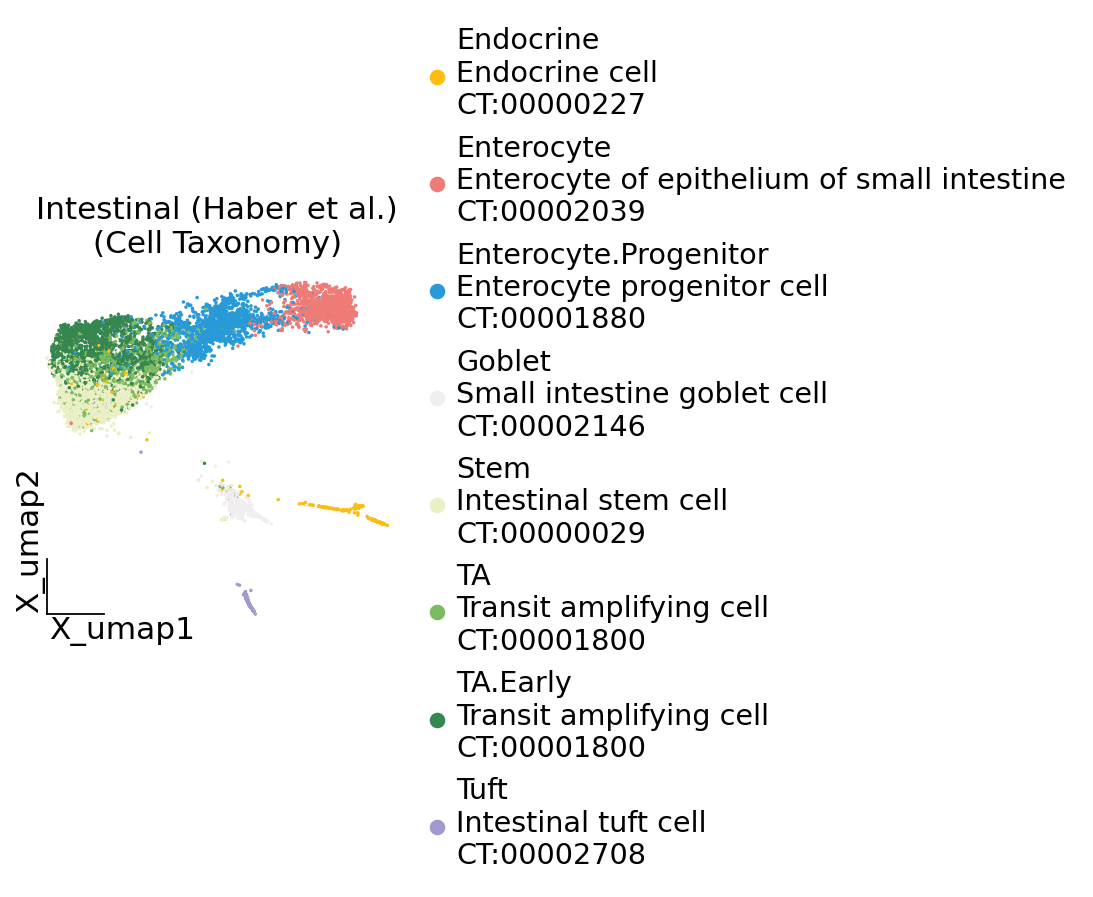

In [43]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j+'\n'+k for i,j,k in zip(
    adata.obs['cell_label'].tolist(),
    adata.obs[goal].tolist(),
    adata.obs['enhanced_cell_ontology_ct_id'].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['cell_label'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['cell_label'].cat.categories,
    adata.uns['cell_label_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Intestinal (Haber et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-gut-Taxonomy-match-id-33.png',dpi=300,bbox_inches='tight')

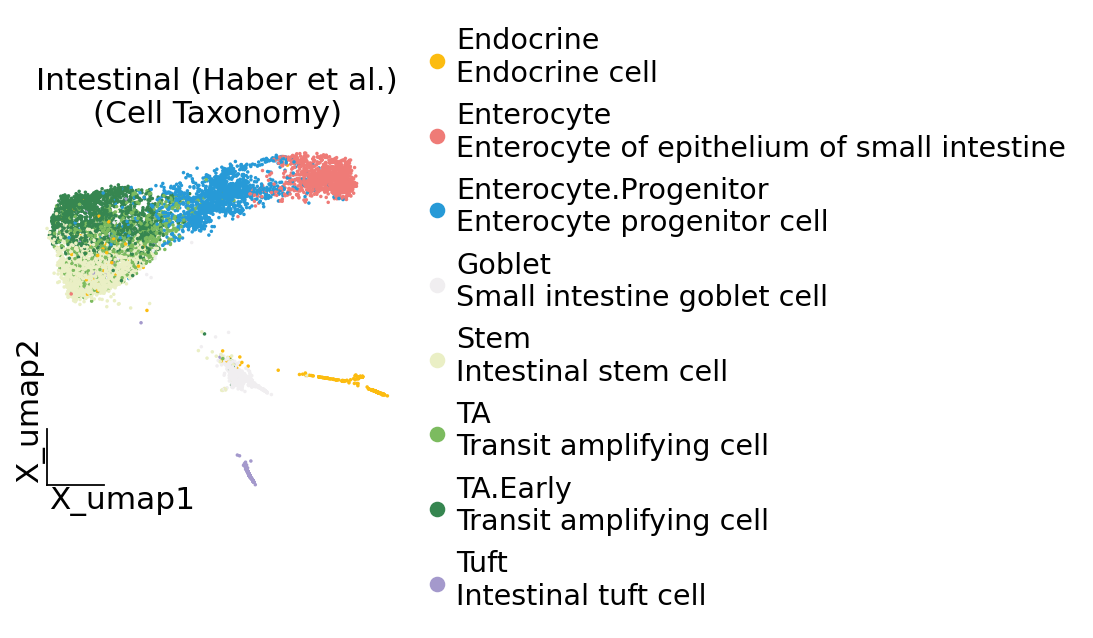

In [44]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j for i,j in zip(
    adata.obs['cell_label'].tolist(),
    adata.obs[goal].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['cell_label'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['cell_label'].cat.categories,
    adata.uns['cell_label_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Intestinal (Haber et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-gut-Taxonomy-match-33.png',dpi=300,bbox_inches='tight')